In [1]:
import sys
!{sys.executable} -m pip install openpyxl


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: C:\Users\vikau\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
!pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\vikau\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [27]:
# ================================
# 1. IMPORT LIBRARY & LOAD DATASET
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

import pickle

# Load dataset
path = r"D:\Tugas_Proyek_Akhir_Rani_Ummi\heart.csv"
df = pd.read_csv(path)

print("Dataset Loaded:", df.shape)
print(df.head())


Dataset Loaded: (1025, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [28]:
# =============================
# 2. PREPROCESSING DATA (FIXED)
# =============================

# Kolom sesuai dataset Heart Disease
cols_expected = [
    'age','sex','cp','trestbps','chol','fbs','restecg',
    'thalach','exang','oldpeak','slope','ca','thal','target'
]

# Filter kolom valid
df = df[cols_expected].copy()

# Shuffle agar tidak overfitting
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Buang baris jika target kosong
df = df.dropna(subset=['target'])

# Isi missing value dengan median
df = df.fillna(df.median(numeric_only=True))

# Jika gender berformat string → convert ke angka
if df['sex'].dtype == object:
    df['sex'] = df['sex'].map({'male': 0, 'female': 1}).fillna(0).astype(int)

print("\nData after preprocessing:")
print(df.head())


Data after preprocessing:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   62    0   0       124   209    0        1      163      0      0.0      2   
1   53    0   2       128   216    0        0      115      0      0.0      2   
2   55    1   0       160   289    0        0      145      1      0.8      1   
3   50    0   1       120   244    0        1      162      0      1.1      2   
4   48    1   0       130   256    1        0      150      1      0.0      2   

   ca  thal  target  
0   0     2       1  
1   0     0       1  
2   1     3       0  
3   0     2       1  
4   2     3       0  


In [29]:
# =============================
# 3. SPLIT DATA & TRAIN MODEL
# =============================

X = df.drop(columns=['target'])
y = df['target']

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (tanpa stratify agar variasi lebih natural)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Model Random Forest (diturunkan kompleksitasnya agar tidak overfitting)
rf = RandomForestClassifier(
    n_estimators=120,
    max_depth=5,
    min_samples_split=8,
    min_samples_leaf=4,
    random_state=42
)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluation
print("\n=== Evaluation Result (Improved) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)



=== Evaluation Result (Improved) ===
Accuracy: 0.9365853658536586
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        92
           1       0.92      0.96      0.94       113

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.94       205
weighted avg       0.94      0.94      0.94       205

Confusion Matrix:
 [[ 83   9]
 [  4 109]]


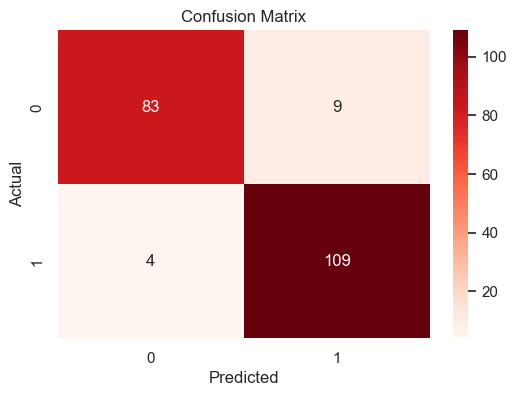

In [31]:
# =================================
# 4. PLOT CONFUSION MATRIX
# =================================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


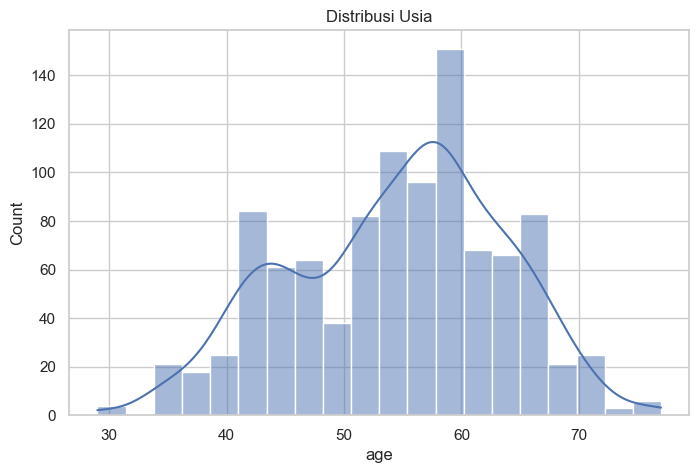

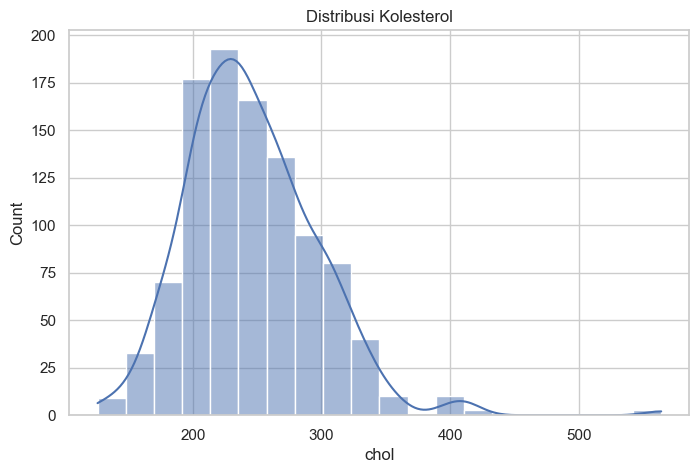

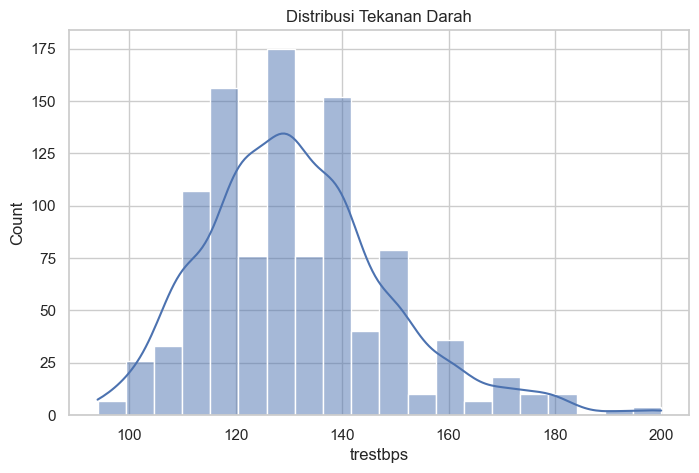

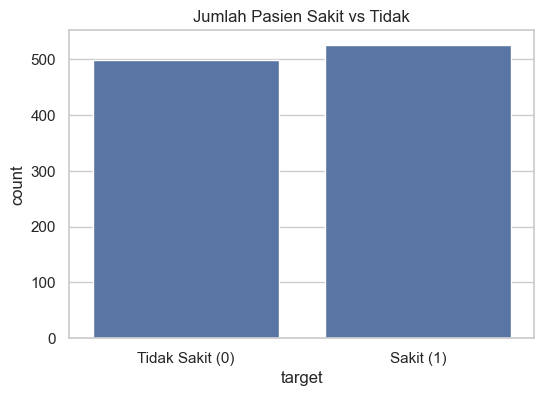

In [32]:
# ============================
# 5. Visualisasi Dataset
# ============================

plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Distribusi Usia")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['chol'], bins=20, kde=True)
plt.title("Distribusi Kolesterol")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['trestbps'], bins=20, kde=True)
plt.title("Distribusi Tekanan Darah")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x=df['target'])
plt.xticks([0,1], ["Tidak Sakit (0)", "Sakit (1)"])
plt.title("Jumlah Pasien Sakit vs Tidak")
plt.show()

C:\Users\vikau\AppData\Local\Temp\ipykernel_21732\4235221832.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")


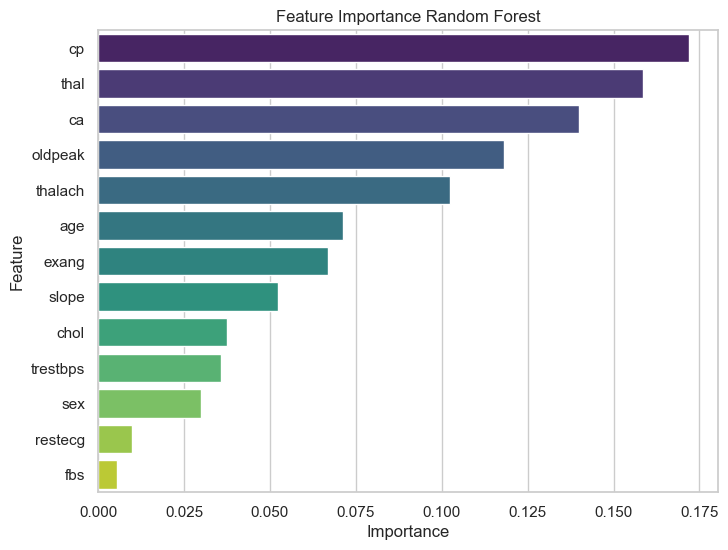

,Feature,Importance
2,cp,0.171842
12,thal,0.158589
11,ca,0.140076
9,oldpeak,0.118220
7,thalach,0.102361
0,age,0.071248
8,exang,0.066872
10,slope,0.052325
4,chol,0.037504
3,trestbps,0.035615


In [33]:
# ============================
# 10. Feature Importance
# ============================

importance = rf.feature_importances_
feat_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")
plt.title("Feature Importance Random Forest")
plt.show()

feat_df


In [34]:
# =================================
# 6. SAVE MODEL
# =================================
with open("model_heart_RF.pkl", "wb") as f:
    pickle.dump(rf, f)

with open("scaler_heart.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("\nModel saved successfully!")


Model saved successfully!
